In [30]:
!pip install beautifulsoup4
!pip install requests
!pip install pandas

In [31]:
#This is the code of Mini-project 1 in Data Science
#Submitted by Moh'd Fawaz Abdel Rahman Abu Quttain
#please check other sections above and below
#This section is for scrapping web and viewing data frames
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np  # For NaN

#Initialize the Panda DataFrame with some columns
data = {
    'Food Name': [None],  # Start with None
    'Image URL': [None],
    'Calories': [None],
    'Personal Points': [None],
    'Summary': [None],
    'Recipe Key': [None]
}

df = pd.DataFrame(data)

main_url = "https://www.skinnytaste.com/recipe-index/?_paged="

for j in range(1,51):
  current_url = f"{main_url}{j}"


  r=requests.get(current_url)

  if r.status_code == 200:
      print('Success')
  elif r.status_code == 404:
      print('Not Found')

  soup = bs(r.text, 'html.parser')

  # recipe_list = soup.select('.post-content')
  recipe_list = soup.find_all('div', class_='post-content')
  num_recipes_page = len(recipe_list)
  print(num_recipes_page)


  for i in range(num_recipes_page):

      #for WW points
      personal_points = recipe_list[i].find('div', class_='wprm-ww-points')
      if personal_points:
          # If found, extract and print the WW Points
          ww_points = personal_points.get_text(strip=True)
          print(f"WW Points: {ww_points}")
          df.loc[ (((j-1)*num_recipes_page) + (i+1)), 'Personal Points'] = float(ww_points)
      else:
          # If not found, print the appropriate message
          print("WW Points not found on the page.")
          continue

      # for the title
      title = recipe_list[i].find('h2', class_='entry-title').get_text(strip=True)
      df.loc[ (((j-1)*num_recipes_page) + (i+1)), 'Food Name'] = title
      print(title)

      #for the image
      img = recipe_list[i].find('img')['src']
      df.loc[ (((j-1)*num_recipes_page) + (i+1)), 'Image URL'] = img

      print(img)



      #go to the link of each recipe to extract data
      recipe_url = recipe_list[i].find('a')['href']
      print(recipe_url)
      recipe_soup = bs(requests.get(recipe_url).text, 'html.parser')


      #find cals
      cals = recipe_soup.find('span', class_='recipe-meta-value value-calories')
      calories = cals.get_text(strip=True).replace('Cals:', '').strip()
      calories = float(calories)
      df.loc[ (((j-1)*num_recipes_page) + (i+1)), 'Calories'] = calories
      print(calories)


      #Append the recipe-keys arrays to their recipe in the DF
      recipe_keys = recipe_soup.find('ul', class_='cat-icons post-icons')
      recipe_keys_list = []
      if recipe_keys:
          recipe_key_element = recipe_keys.find_all('li')
          for li in recipe_key_element:
              recipe_keys_list.append(li.get_text(strip=True))
      df.loc[ (((j-1)*num_recipes_page) + (i+1)), 'Recipe Key'] = recipe_keys_list
      print(recipe_keys_list)

          #find summary
      summary = recipe_soup.find('p').get_text(strip=True)
      df.loc[ (((j-1)*num_recipes_page) + (i+1)), 'Summary'] = summary
      print(summary)


      print('\n------------------------------------------\n')




from IPython.display import display


# Create a DataFrame to display images instead of URLs
image_display_df = pd.DataFrame({
    'Food Name': df['Food Name'],
    'Calories': df['Calories'],
    'Personal Points': df['Personal Points'],
    'Summary': df['Summary'],
    'Recipe Key': df['Recipe Key'],
    'Image': df['Image URL'].apply(lambda x: f'<img src="{x}" width="100" />')  # Adjust the width as necessary
})

# Use HTML to display the DataFrame with images rendered
from IPython.core.display import HTML
display(HTML(image_display_df.to_html(escape=False)))



Streaming output truncated to the last 5000 lines.
------------------------------------------

WW Points: 5
Peach Pie Cottage Cheese Bowls
https://www.skinnytaste.com/wp-content/uploads/2022/07/Peach-Pie-Cottage-Cheese-Bowls-3-260x390.jpg
https://www.skinnytaste.com/peach-pie-cottage-cheese-bowls/
272.0
['HP', 'Q', 'V']
Peach PieCottage CheeseBowls is a delicious, high proteinbreakfastmade with fresh, ripe summer peaches.

------------------------------------------

WW Points: 1
Gandules Guisados (Stewed Pigeon Peas)
https://www.skinnytaste.com/wp-content/uploads/2022/07/Gandules-4-260x390.jpg
https://www.skinnytaste.com/gandules-guisados-stewed-pigeon-peas/
131.0
['DF', 'FM', 'GF', 'KF', 'Q', 'V']
Quick and easy recipe forgandulesusing canned pigeon peas simmered in a tomato-based sauce. An inexpensive, flavorful Latin side dish!

------------------------------------------

WW Points: 0
Puerto Rican Sofrito Recipe
https://www.skinnytaste.com/wp-content/uploads/2022/07/Puerto-Rican-Sof

,Food Name,Calories,Personal Points,Summary,Recipe Key,Image
0,None,None,None,None,None,
2,Breakfast Burritos,261.0,5.0,"These freezerbreakfastburritos are stuffed with scrambled eggs, scallions, bell pepper, bacon, and cheese, making them a delicious, protein-packed way to start the day! Freeze them for meal prep so you can have them ready all week long.","[AF, FM, HF, KF, MP, Q]",
3,Crustless Pumpkin Pie,124.5,2.0,"Skip the crust and make this easy gluten-free, dairy-free crustless pumpkin pie this fall for a cozy night when you crave apumpkin treator as a healthier alternative forThanksgiving.","[DF, GF, HF, V]",
4,Red Curry Salmon,349.0,6.0,"Thai-inspired Red Curry Salmon is simmered in an incredibly tasty coconut red curry sauce with bell peppers, garlic and onions.","[DF, GF, HP]",
5,Apple Butter,34.0,1.0,"This easy apple butter recipe simmers on the stove, made with apples, cinnamon, nutmeg, and allspice, it smells and tastes like fall!","[DF, GF, KF, V]",
6,Roasted Delicata Squash,177.0,4.0,"Roasted Delicata Squash with toasted almonds, sweetened with maple syrup and seasoned with sage and paprika, makes a perfect fall side dish.","[DF, GF, V]",
7,Apple Bread,124.0,4.0,"Moist cinnamon apple bread recipe made with applesauce, small chunks of fresh apples and walnuts in every bite. It’s so moist and delicious, you won’t believe it’s light!",[V],
8,Autumn Salad with Pears and Gorgonzola,175.0,5.0,"I love a good salad with lots of texture and flavors, and this Autumn Salad nails it. Sweet pears, honey Dijon dressing, crunchy pecans, and creamy gorgonzola cheese create a delicious fall dish that’s hard to resist.","[GF, LC, Q, V]",
9,Sesame Chicken,513.0,9.0,"This lighter Sesame Chicken recipe featureschicken breastbites in a sweet, savory, tangy, and slightly spicy sauce topped with sesame seeds and green onions.","[DF, FM, GF, HP]",
10,Bacon in the Oven,60.0,2.0,"Whether you’re a fan of tender, crisp, or extra crispy bacon, this simple method of cooking bacon in the oven is easy. There’s no stovetop mess, and it frees up your stove for cooking otherbreakfastitems!","[DF, GF, HP, KF, LC, Q, W]",


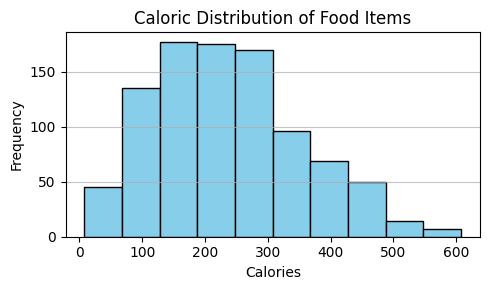

Skewness of the Calories distribution: 0.4836160675683704


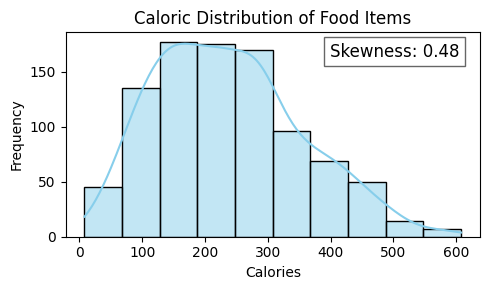

Skewness of the Personal Points distribution: 0.3145920375794917


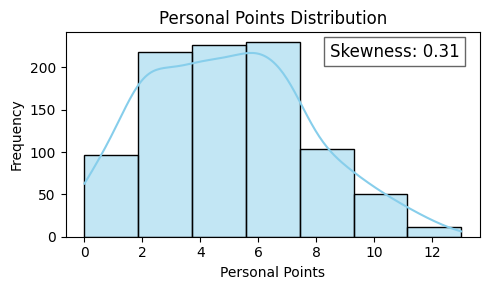

<ipython-input-32-f814fe5a37b6>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recipe_key_counts.index, y=recipe_key_counts.values, palette='viridis')


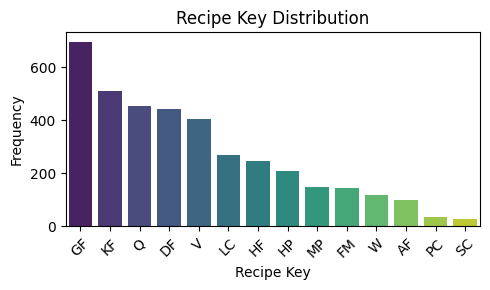

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

#plotting section

# Clean up the DataFrame by dropping rows with NaN values in 'Calories' or 'Food Name'
#This step is for rows with no values if WW points or Cals were not found, so panda can deal with the frame
df.dropna(subset=['Calories', 'Food Name'], inplace=True)

# Plotting the caloric distribution as a histogram
plt.figure(figsize=(5, 3))
plt.hist(df['Calories'], bins=10, color='skyblue', edgecolor='black')  # Adjust bins as necessary
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Caloric Distribution of Food Items')
plt.grid(axis='y', alpha=0.75)  # Add grid lines for better visibility
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


# Calculate skewness
calories_skewness = df['Calories'].skew()
print(f"Skewness of the Calories distribution: {calories_skewness}")

# Plotting the caloric distribution using seaborn
plt.figure(figsize=(5, 3))
sns.histplot(df['Calories'], bins=10, kde=True, color='skyblue')  # kde=True adds a density estimate line
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Caloric Distribution of Food Items')

# Add skewness annotation
plt.text(0.95, 0.95, f'Skewness: {calories_skewness:.2f}',
         transform=plt.gca().transAxes,
         fontsize=12,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()  # Adjust layout to fit labels
plt.show()


#---------------------
# Convert 'Personal Points' to numeric (if necessary, with errors='coerce' to handle any non-numeric values)
df['Personal Points'] = pd.to_numeric(df['Personal Points'], errors='coerce')

# Calculate skewness for Personal Points
points_skewness = df['Personal Points'].skew()
print(f"Skewness of the Personal Points distribution: {points_skewness}")

# Plotting the Personal Points distribution using seaborn
plt.figure(figsize=(5, 3))
sns.histplot(df['Personal Points'].dropna(), bins=7, kde=True, color='skyblue')  # dropna() removes NaN values
plt.xlabel('Personal Points')
plt.ylabel('Frequency')
plt.title('Personal Points Distribution')

# Add skewness annotation
plt.text(0.95, 0.95, f'Skewness: {points_skewness:.2f}',
         transform=plt.gca().transAxes,
         fontsize=12,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()  # Adjust layout to fit labels
plt.show()


# ------------------------- Recipe Key Distribution Plot -------------------------

#1 Flatten the Recipe Key lists into a single list
all_keys = [key for sublist in df['Recipe Key'] if sublist is not None for key in sublist]

#2 Count the frequency of each unique key
recipe_key_counts = pd.Series(all_keys).value_counts()

#3 Plot the recipe key distribution
plt.figure(figsize=(5, 3))
sns.barplot(x=recipe_key_counts.index, y=recipe_key_counts.values, palette='viridis')
plt.xlabel('Recipe Key')
plt.ylabel('Frequency')
plt.title('Recipe Key Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



In [33]:
#Filter based on the caloric range from user input
# Step 1: Get user input for calorie range
min_calories = float(input("Enter minimum calories: "))
max_calories = float(input("Enter maximum calories: "))

# Step 2: Filter the DataFrame based on the input calorie range
calorie_filtered_df = df[
    (df['Calories'] >= min_calories) & (df['Calories'] <= max_calories)
]

# Step 3: Display the filtered DataFrame (including the image)
from IPython.display import display, Image, HTML

# Convert image URLs to HTML img tags for display
calorie_filtered_df['Image URL'] = calorie_filtered_df['Image URL'].apply(lambda x: f'<img src="{x}" width="100">')

print("Filtered by Calorie Range:")
display(HTML(calorie_filtered_df.to_html(escape=False)))


Enter minimum calories: 400
Enter maximum calories: 600
Filtered by Calorie Range:


<ipython-input-33-cc1188e41149>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calorie_filtered_df['Image URL'] = calorie_filtered_df['Image URL'].apply(lambda x: f'<img src="{x}" width="100">')


,Food Name,Image URL,Calories,Personal Points,Summary,Recipe Key
9,Sesame Chicken,,513.0,9.0,"This lighter Sesame Chicken recipe featureschicken breastbites in a sweet, savory, tangy, and slightly spicy sauce topped with sesame seeds and green onions.","[DF, FM, GF, HP]"
12,Homemade Hamburger Helper,,453.0,12.0,"This one-skillet, creamy Homemade Hamburger Helper is made with ground beef, macaroni and cheese – real ingredients you can feel good about feeding your family fordinner!","[DF, GF, HP, KF, Q]"
23,Shrimp and Rice (Arroz Con Camarones),,433.0,9.0,Costa Rican Inspired Shrimp and Rice (Arroz Con Camarones) is a traditional Costa Rican recipe that’s so easy and flavorful!,"[DF, GF, HP]"
54,Grilled Skirt Steak and Elote Tacos,,418.0,10.0,Grilled skirt steak tacos topped with Mexican street corn is a match made in heaven for an easy summerdinner idea!,"[GF, HP, KF]"
67,Nicoise Salad,,494.0,5.0,"I used salmon in place of tuna in this variation of the classic French Niçoise salad! This composed salad contains olives, artichokes, potatoes, green beans, and a whole-grain mustard vinaigrette.","[DF, GF, HP, HF, MP, W]"
70,Coconut Chicken Rice Bowl,,429.0,8.0,"This quick and easy high-protein Coconut ChickenRice Bowlis perfect forlunchordinnerfor mygluten-free,dairy-freefriends!","[DF, GF, HP, MP, Q]"
88,Pad Thai,,420.0,9.0,"Who needs takeout when this easy Pad Thai recipe is ready in just 25 minutes? My lightened up version has that signature sweet-and-tangy flavor, along with rice noodles, bean sprouts, tender shrimp, and scrambled eggs. Customize it with your favorite protein!","[DF, GF, KF, Q]"
94,One Pot Chicken and Orzo,,425.0,11.0,"In this One-Pot Chicken and Orzo recipe, crispy chicken thighs cook right on top of the orzo in a garlicky tomato sauce with basil. It’s simple to make, serve it straight from the oven with your favorite side salad.",[HP]
121,Cranberry Chicken Salad on Apple Slices,,439.0,6.0,"Easy Cranberry Chicken Salad on Apple Slices make a sweet, crunchy, protein-packedlunch!","[DF, GF, HP, HF, Q]"
123,Air Fryer Peanut Curry Tofu with Gingery Cauliflower Rice,,453.0,7.0,"This delicious Air Fryer Peanut Curry Tofu with GingeryCauliflower Riceis a quick, vegan, high protein, low-carb meal.","[AF, DF, GF, HP, HF, LC, MP, V]"


In [34]:
#Filter based ont he point range from user input
# Step 1: Get user input for points range
min_points = float(input("Enter minimum personal points: "))
max_points = float(input("Enter maximum personal points: "))

# Step 2: Filter the DataFrame based on the input points range
points_filtered_df = df[
    (df['Personal Points'] >= min_points) & (df['Personal Points'] <= max_points)
]

# Step 3: Display the filtered DataFrame (including the image)
from IPython.display import display, Image, HTML

# Convert image URLs to HTML img tags for display
points_filtered_df['Image URL'] = points_filtered_df['Image URL'].apply(lambda x: f'<img src="{x}" width="100">')

print("Filtered by Points Range:")
display(HTML(points_filtered_df.to_html(escape=False)))


Enter minimum personal points: 0
Enter maximum personal points: 7
Filtered by Points Range:


<ipython-input-34-6f2ae193c6fe>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_filtered_df['Image URL'] = points_filtered_df['Image URL'].apply(lambda x: f'<img src="{x}" width="100">')


,Food Name,Image URL,Calories,Personal Points,Summary,Recipe Key
2,Breakfast Burritos,,261.0,5.0,"These freezerbreakfastburritos are stuffed with scrambled eggs, scallions, bell pepper, bacon, and cheese, making them a delicious, protein-packed way to start the day! Freeze them for meal prep so you can have them ready all week long.","[AF, FM, HF, KF, MP, Q]"
3,Crustless Pumpkin Pie,,124.5,2.0,"Skip the crust and make this easy gluten-free, dairy-free crustless pumpkin pie this fall for a cozy night when you crave apumpkin treator as a healthier alternative forThanksgiving.","[DF, GF, HF, V]"
4,Red Curry Salmon,,349.0,6.0,"Thai-inspired Red Curry Salmon is simmered in an incredibly tasty coconut red curry sauce with bell peppers, garlic and onions.","[DF, GF, HP]"
5,Apple Butter,,34.0,1.0,"This easy apple butter recipe simmers on the stove, made with apples, cinnamon, nutmeg, and allspice, it smells and tastes like fall!","[DF, GF, KF, V]"
6,Roasted Delicata Squash,,177.0,4.0,"Roasted Delicata Squash with toasted almonds, sweetened with maple syrup and seasoned with sage and paprika, makes a perfect fall side dish.","[DF, GF, V]"
7,Apple Bread,,124.0,4.0,"Moist cinnamon apple bread recipe made with applesauce, small chunks of fresh apples and walnuts in every bite. It’s so moist and delicious, you won’t believe it’s light!",[V]
8,Autumn Salad with Pears and Gorgonzola,,175.0,5.0,"I love a good salad with lots of texture and flavors, and this Autumn Salad nails it. Sweet pears, honey Dijon dressing, crunchy pecans, and creamy gorgonzola cheese create a delicious fall dish that’s hard to resist.","[GF, LC, Q, V]"
10,Bacon in the Oven,,60.0,2.0,"Whether you’re a fan of tender, crisp, or extra crispy bacon, this simple method of cooking bacon in the oven is easy. There’s no stovetop mess, and it frees up your stove for cooking otherbreakfastitems!","[DF, GF, HP, KF, LC, Q, W]"
11,Pumpkin Spice Latte,,115.0,7.0,"Embrace all the cozy fall vibes with a homemade Pumpkin Spice Latte! This easy recipe tastes just like the original, but for a fraction of the cost.","[DF, GF, V]"
13,Fried Brown Rice,,276.0,6.0,Fried Brown Rice is a healthy twist on classic fried rice with some extra hidden veggies to bulk it up. Just add your favorite protein to make it a meal!,"[DF, GF, HF, Q, V]"


Top 10 Foods Sorted by Calories:


,Calories,Image URL,Summary
343,401.0,,"Inspired by my Shepherd’s Pie, I made an easy and healthy, stuffed sweet potato topped with ground turkey shepherds pie filling – it came out great!"
190,402.0,,"This fall butternut squash lasagna swaps pasta forbutternut squashand layered with chicken sausage, tomato sauce, ricotta, and mozzarella. It’s so delicious, you won’t miss the pasta!"
463,402.0,,"This easysausage and potato soupis hearty, healthy and dairy-free, made creamy by pureeing cannellini beans."
252,403.0,,"I’m obsessed with this spicy salmon sushi pizza made with spicy mayo, sushi-grade salmon, avocado, scallions, and jalapeño on a tortilla crust."
444,404.0,,Korean-Inspired Salmon Tacos with Spicy Gochujang Slaw is a delicious way to switch up your fish taco game!
322,404.0,,This easy Green Smoothie Bowl is a tasty and nutritiousbreakfastthat’s customizable and packed with healthy ingredients that will keep you feeling great all morning!
511,404.0,,I’ll be making this high-protein Tuna Poke Salad with Wasabi-Soy Vinaigrette all summer long!
584,405.0,,"Sancocho de Pollo, a hearty soup almost like a stew, is a traditional dish in the Antioquia region of Colombia that combines potatoes, yuca, corn, plantains, and chicken."
262,406.0,,"My favorite Grilled Chicken Sandwich, made with tender, pickle-brined grilled chicken breast with a zesty slaw and spicy mayo – so good!!"
727,407.0,,These Baked Spinach Stuffed Chicken Breasts with Sun-Dried Tomatoes and Feta Cheese are high in protein and low in carbs – a filling meal in one!


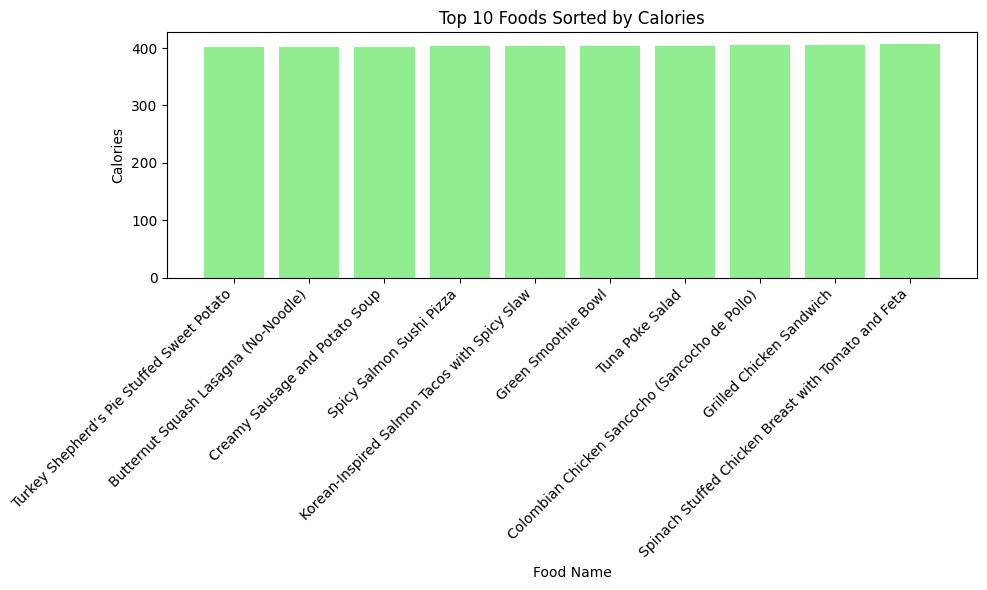

In [35]:
#Output the first 10 foods sorted based on calories (Ascendingly), include their image and their summary
# Step 1: Sort the DataFrame (after filtering) based on 'Calories' in ascending order
sorted_calorie_df = calorie_filtered_df.sort_values(by='Calories', ascending=True)

# Step 2: Select the first 10 entries
top_10_calorie_df = sorted_calorie_df.head(10)

# Step 3: Display the top 10 foods sorted by calories (including the image and summary)
print("Top 10 Foods Sorted by Calories:")
display(HTML(top_10_calorie_df[['Calories', 'Image URL', 'Summary']].to_html(escape=False)))

# Step 4: Plot the data for the top 10 foods sorted by calories
import matplotlib.pyplot as plt

# Plot calories for the top 10 foods
plt.figure(figsize=(10, 6))
plt.bar(top_10_calorie_df['Food Name'], top_10_calorie_df['Calories'], color='lightgreen')
plt.xlabel('Food Name')
plt.ylabel('Calories')
plt.title('Top 10 Foods Sorted by Calories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:

#-------------IGNORE THIS CODE --------------------
#-------------IGNORE THIS CODE --------------------
#-------------IGNORE THIS CODE --------------------
#It filters based on calories for the whole list

# Sort the DataFrame by 'Calories' in descending order to get the top 10 highest-calorie foods
top_10_foods = df.sort_values(by='Calories', ascending=False).head(10)

# Create a new DataFrame to hold the data you want to display
display_df = pd.DataFrame({
    'Food Name': top_10_foods['Food Name'],
    'Calories': top_10_foods['Calories'],
    'Summary': top_10_foods['Summary'],
    'Image': top_10_foods['Image URL'].apply(lambda x: f'<img src="{x}" width="100" />')  # Adjust width as necessary
})

# Display the DataFrame with images rendered
from IPython.core.display import HTML
HTML(display_df.to_html(escape=False))


In [ ]:

#-------------IGNORE THIS CODE --------------------
#-------------IGNORE THIS CODE --------------------
#-------------IGNORE THIS CODE --------------------

#Filter based on both calories and personal points (INTERSECTED INPUT)

#1 Get user input for calorie range
min_calories = float(input("Enter minimum calories: "))
max_calories = float(input("Enter maximum calories: "))

#2 Get user input for points range
min_points = float(input("Enter minimum personal points: "))
max_points = float(input("Enter maximum personal points: "))

# Step 3: Filter the DataFrame based on the input ranges
filtered_df = df[
    (df['Calories'] >= min_calories) & (df['Calories'] <= max_calories) &
    (df['Personal Points'] >= min_points) & (df['Personal Points'] <= max_points)
]

# Step 4: Display the filtered DataFrame
from IPython.display import display
display(filtered_df)
